# Keras TF 2.0 - Code Along Classification Project

Let's explore a classification task with Keras API for TF 2.0

## The Data

### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

Features are computed from a digitized image of a fine needle
aspirate (FNA) of a breast mass.  They describe
characteristics of the cell nuclei present in the image.

Separating plane described above was obtained using
Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree
Construction Via Linear Programming." Proceedings of the 4th
Midwest Artificial Intelligence and Cognitive Science Society,
pp. 97-101, 1992], a classification method which uses linear
programming to construct a decision tree.  Relevant features
were selected using an exhaustive search in the space of 1-4
features and 1-3 separating planes.

The actual linear program used to obtain the separating plane
in the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear
Programming Discrimination of Two Linearly Inseparable Sets",
Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:

ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

.. topic:: References

   - W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction 
     for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on 
     Electronic Imaging: Science and Technology, volume 1905, pages 861-870,
     San Jose, CA, 1993.
   - O.L. Mangasarian, W.N. Street and W.H. Wolberg. Breast cancer diagnosis and 
     prognosis via linear programming. Operations Research, 43(4), pages 570-577, 
     July-August 1995.
   - W.H. Wolberg, W.N. Street, and O.L. Mangasarian. Machine learning techniques
     to diagnose breast cancer from fine-needle aspirates. Cancer Letters 77 (1994) 
     163-171.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score, explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix, f1_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

In [5]:
def perc_col(df,col):
    for i in sorted(df[col].unique(),reverse=True):
        print('%s: %%%.2f' % (i, 100*df[col].value_counts()[i]/len(df)))

perc_col(df,'benign_0__mal_1')

1: %62.74
0: %37.26


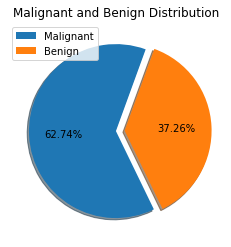

1    357
0    212
Name: benign_0__mal_1, dtype: int64

In [6]:
plt.pie(df['benign_0__mal_1'].value_counts(),explode=[0,0.1],autopct='%1.2f%%',shadow=True,startangle=70)
plt.legend(labels=['Malignant','Benign'])
plt.title('Malignant and Benign Distribution')
plt.axis('off')
plt.show()

df['benign_0__mal_1'].value_counts()

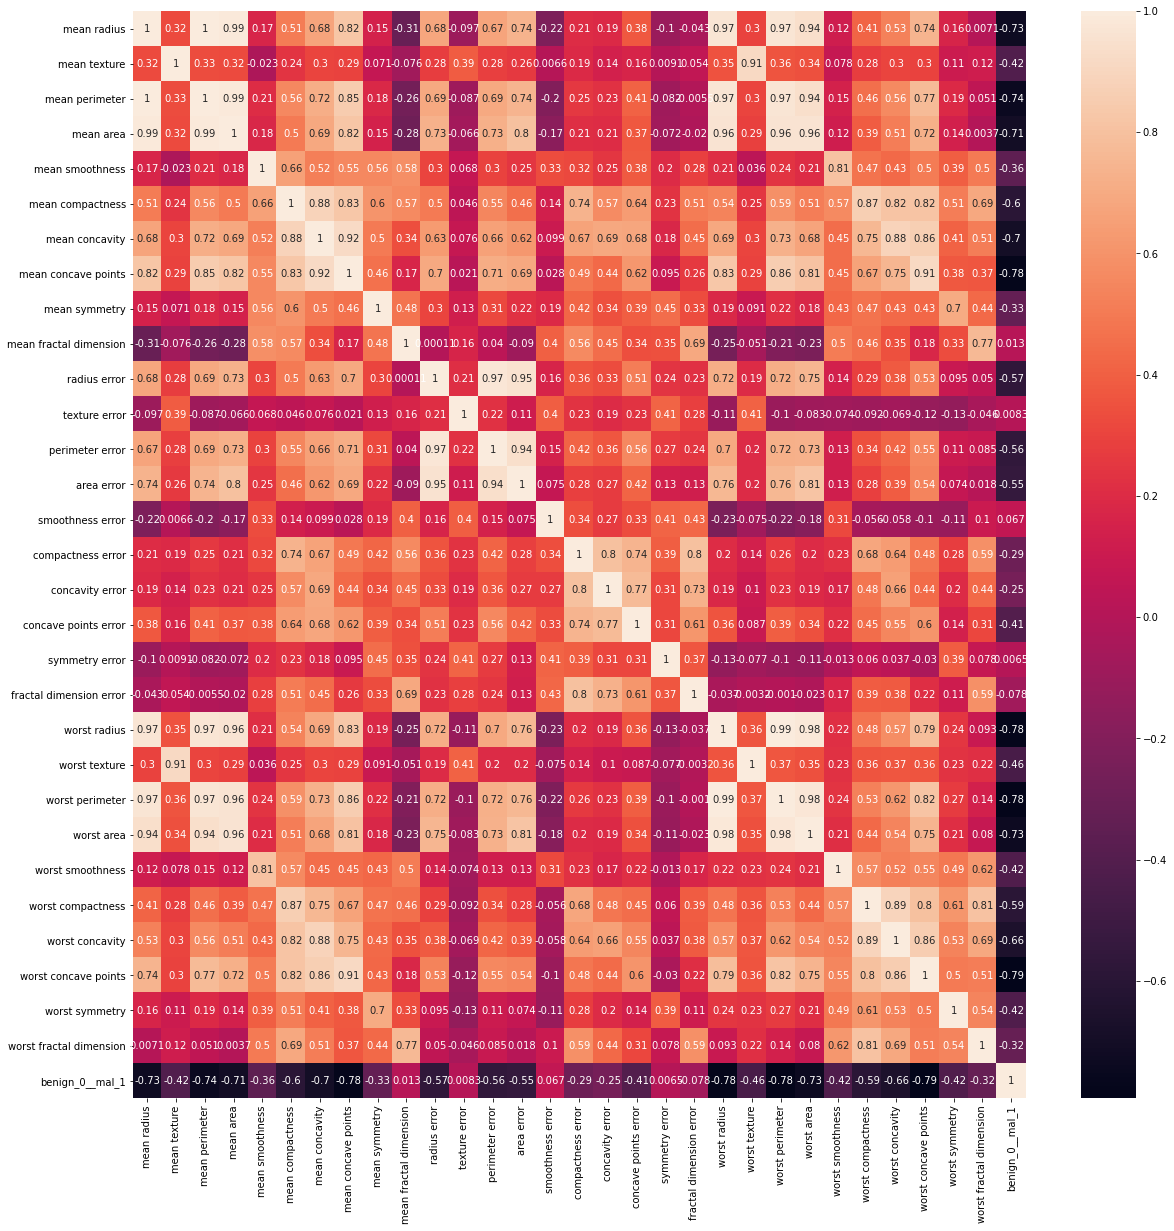

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True);

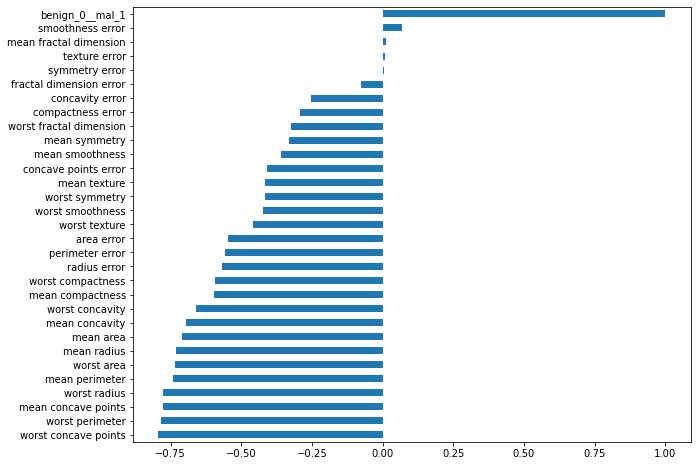

In [8]:
plt.figure(figsize=(10,8))
df.corr()['benign_0__mal_1'].sort_values().plot.barh();

In [9]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

**worst concave points and area error**

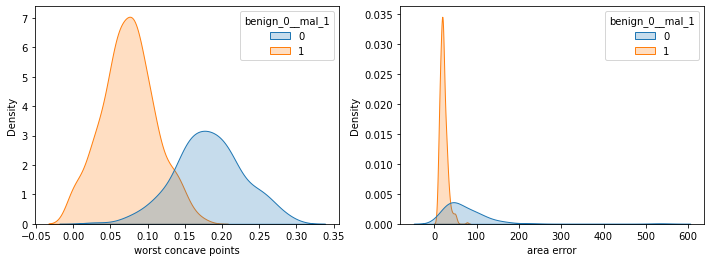

In [10]:
plt.figure(figsize=(12,4))
plt.subplot(121)
sns.kdeplot(x='worst concave points',data=df,shade=True, hue='benign_0__mal_1')
plt.subplot(122)
sns.kdeplot(x='area error',data=df,shade=True, hue='benign_0__mal_1')
plt.show()

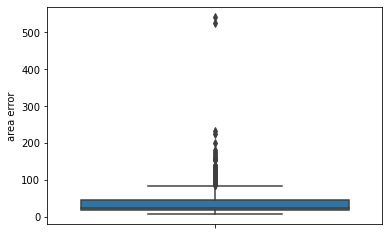

In [11]:
sns.boxplot(y='area error',data=df)
plt.show()

In [12]:
drop_list=['mean radius', 
           'mean texture', 
#            'mean perimeter','mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 
#            'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
#            'worst radius', 
        'worst texture', 
#         'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1']

In [13]:
df=df[drop_list]

In [14]:
df.duplicated().any()

False

## Train Test Split

In [203]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101) #stratify=y,


## Scaling Data

In [204]:
scaler = MinMaxScaler()
# scaler = RobustScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
 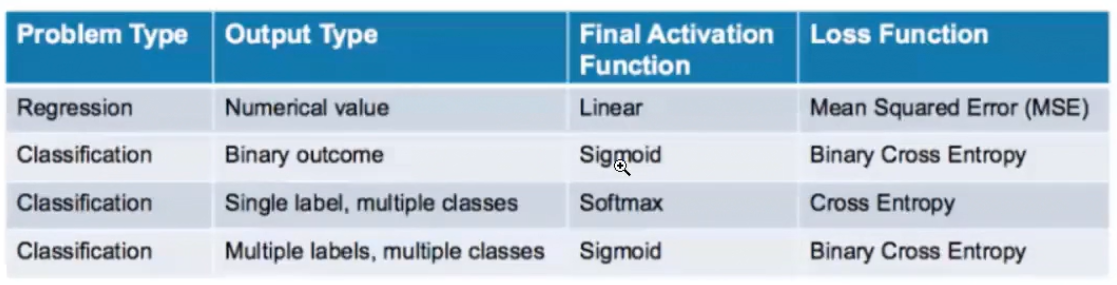

In [205]:
X_train.shape, X_test.shape

((426, 23), (143, 23))

In [206]:
model = Sequential()
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw
model.add(Dense(24,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='sigmoid')) # binary classification oldugu icin outbut layer Dense 1 secilir, aktivation function sigmoid.

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=["accuracy"])

## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [207]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=350,
#           batch_size=16,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/350
14/14 [==============================] - 1s 13ms/step - loss: 0.6987 - accuracy: 0.5296 - val_loss: 0.6817 - val_accuracy: 0.6154
Epoch 2/350
14/14 [==============================] - 0s 4ms/step - loss: 0.6744 - accuracy: 0.6500 - val_loss: 0.6560 - val_accuracy: 0.6364
Epoch 3/350
14/14 [==============================] - 0s 4ms/step - loss: 0.6534 - accuracy: 0.6794 - val_loss: 0.6233 - val_accuracy: 0.7552
Epoch 4/350
14/14 [==============================] - 0s 4ms/step - loss: 0.6168 - accuracy: 0.7271 - val_loss: 0.5890 - val_accuracy: 0.7692
Epoch 5/350
14/14 [==============================] - 0s 5ms/step - loss: 0.5844 - accuracy: 0.7368 - val_loss: 0.5507 - val_accuracy: 0.8601
Epoch 6/350
14/14 [==============================] - 0s 4ms/step - loss: 0.5379 - accuracy: 0.8062 - val_loss: 0.5128 - val_accuracy: 0.8601
Epoch 7/350
14/14 [==============================] - 0s 5ms/step - loss: 0.5072 - accuracy: 0.8544 - val_loss: 0.4741 - val_accuracy: 0.8881
Epoch 8/350


Epoch 59/350
14/14 [==============================] - 0s 6ms/step - loss: 0.0637 - accuracy: 0.9842 - val_loss: 0.1162 - val_accuracy: 0.9650
Epoch 60/350
14/14 [==============================] - 0s 5ms/step - loss: 0.0711 - accuracy: 0.9768 - val_loss: 0.1138 - val_accuracy: 0.9580
Epoch 61/350
14/14 [==============================] - 0s 5ms/step - loss: 0.0660 - accuracy: 0.9809 - val_loss: 0.1200 - val_accuracy: 0.9720
Epoch 62/350
14/14 [==============================] - 0s 4ms/step - loss: 0.0616 - accuracy: 0.9789 - val_loss: 0.1141 - val_accuracy: 0.9650
Epoch 63/350
14/14 [==============================] - 0s 4ms/step - loss: 0.0769 - accuracy: 0.9789 - val_loss: 0.1167 - val_accuracy: 0.9720
Epoch 64/350
14/14 [==============================] - 0s 4ms/step - loss: 0.0659 - accuracy: 0.9806 - val_loss: 0.1155 - val_accuracy: 0.9720
Epoch 65/350
14/14 [==============================] - 0s 4ms/step - loss: 0.0679 - accuracy: 0.9809 - val_loss: 0.1168 - val_accuracy: 0.9720
Epoch 

14/14 [==============================] - 0s 5ms/step - loss: 0.0626 - accuracy: 0.9793 - val_loss: 0.1213 - val_accuracy: 0.9720
Epoch 117/350
14/14 [==============================] - 0s 5ms/step - loss: 0.0529 - accuracy: 0.9843 - val_loss: 0.1207 - val_accuracy: 0.9720
Epoch 118/350
14/14 [==============================] - 0s 5ms/step - loss: 0.0389 - accuracy: 0.9888 - val_loss: 0.1212 - val_accuracy: 0.9720
Epoch 119/350
14/14 [==============================] - 0s 4ms/step - loss: 0.0543 - accuracy: 0.9813 - val_loss: 0.1236 - val_accuracy: 0.9790
Epoch 120/350
14/14 [==============================] - 0s 4ms/step - loss: 0.0549 - accuracy: 0.9818 - val_loss: 0.1210 - val_accuracy: 0.9720
Epoch 121/350
14/14 [==============================] - 0s 4ms/step - loss: 0.0513 - accuracy: 0.9878 - val_loss: 0.1241 - val_accuracy: 0.9790
Epoch 122/350
14/14 [==============================] - 0s 5ms/step - loss: 0.0461 - accuracy: 0.9883 - val_loss: 0.1254 - val_accuracy: 0.9790
Epoch 123/350

14/14 [==============================] - 0s 4ms/step - loss: 0.0331 - accuracy: 0.9871 - val_loss: 0.1332 - val_accuracy: 0.9790
Epoch 174/350
14/14 [==============================] - 0s 4ms/step - loss: 0.0472 - accuracy: 0.9794 - val_loss: 0.1335 - val_accuracy: 0.9790
Epoch 175/350
14/14 [==============================] - 0s 5ms/step - loss: 0.0573 - accuracy: 0.9820 - val_loss: 0.1248 - val_accuracy: 0.9720
Epoch 176/350
14/14 [==============================] - 0s 4ms/step - loss: 0.0343 - accuracy: 0.9884 - val_loss: 0.1365 - val_accuracy: 0.9790
Epoch 177/350
14/14 [==============================] - 0s 4ms/step - loss: 0.0358 - accuracy: 0.9909 - val_loss: 0.1282 - val_accuracy: 0.9790
Epoch 178/350
14/14 [==============================] - 0s 4ms/step - loss: 0.0313 - accuracy: 0.9891 - val_loss: 0.1344 - val_accuracy: 0.9790
Epoch 179/350
14/14 [==============================] - 0s 4ms/step - loss: 0.0567 - accuracy: 0.9768 - val_loss: 0.1321 - val_accuracy: 0.9790
Epoch 180/350

14/14 [==============================] - 0s 4ms/step - loss: 0.0395 - accuracy: 0.9865 - val_loss: 0.1466 - val_accuracy: 0.9790
Epoch 231/350
14/14 [==============================] - 0s 4ms/step - loss: 0.0504 - accuracy: 0.9797 - val_loss: 0.1545 - val_accuracy: 0.9790
Epoch 232/350
14/14 [==============================] - 0s 4ms/step - loss: 0.0332 - accuracy: 0.9894 - val_loss: 0.1386 - val_accuracy: 0.9720
Epoch 233/350
14/14 [==============================] - 0s 4ms/step - loss: 0.0403 - accuracy: 0.9821 - val_loss: 0.1452 - val_accuracy: 0.9790
Epoch 234/350
14/14 [==============================] - 0s 4ms/step - loss: 0.0411 - accuracy: 0.9824 - val_loss: 0.1394 - val_accuracy: 0.9720
Epoch 235/350
14/14 [==============================] - 0s 4ms/step - loss: 0.0525 - accuracy: 0.9781 - val_loss: 0.1436 - val_accuracy: 0.9790
Epoch 236/350
14/14 [==============================] - 0s 4ms/step - loss: 0.0483 - accuracy: 0.9818 - val_loss: 0.1405 - val_accuracy: 0.9790
Epoch 237/350

14/14 [==============================] - 0s 5ms/step - loss: 0.0369 - accuracy: 0.9851 - val_loss: 0.1593 - val_accuracy: 0.9790
Epoch 288/350
14/14 [==============================] - 0s 4ms/step - loss: 0.0407 - accuracy: 0.9816 - val_loss: 0.1584 - val_accuracy: 0.9790
Epoch 289/350
14/14 [==============================] - 0s 4ms/step - loss: 0.0293 - accuracy: 0.9889 - val_loss: 0.1639 - val_accuracy: 0.9790
Epoch 290/350
14/14 [==============================] - 0s 5ms/step - loss: 0.0417 - accuracy: 0.9816 - val_loss: 0.1510 - val_accuracy: 0.9720
Epoch 291/350
14/14 [==============================] - 0s 4ms/step - loss: 0.0369 - accuracy: 0.9865 - val_loss: 0.1639 - val_accuracy: 0.9790
Epoch 292/350
14/14 [==============================] - 0s 4ms/step - loss: 0.0396 - accuracy: 0.9826 - val_loss: 0.1521 - val_accuracy: 0.9720
Epoch 293/350
14/14 [==============================] - 0s 5ms/step - loss: 0.0332 - accuracy: 0.9813 - val_loss: 0.1570 - val_accuracy: 0.9790
Epoch 294/350

14/14 [==============================] - 0s 4ms/step - loss: 0.0303 - accuracy: 0.9889 - val_loss: 0.1767 - val_accuracy: 0.9580
Epoch 345/350
14/14 [==============================] - 0s 4ms/step - loss: 0.0233 - accuracy: 0.9938 - val_loss: 0.1730 - val_accuracy: 0.9650
Epoch 346/350
14/14 [==============================] - 0s 4ms/step - loss: 0.0288 - accuracy: 0.9918 - val_loss: 0.1742 - val_accuracy: 0.9580
Epoch 347/350
14/14 [==============================] - 0s 4ms/step - loss: 0.0236 - accuracy: 0.9901 - val_loss: 0.1712 - val_accuracy: 0.9650
Epoch 348/350
14/14 [==============================] - 0s 4ms/step - loss: 0.0412 - accuracy: 0.9816 - val_loss: 0.1693 - val_accuracy: 0.9650
Epoch 349/350
14/14 [==============================] - 0s 4ms/step - loss: 0.0395 - accuracy: 0.9769 - val_loss: 0.1627 - val_accuracy: 0.9720
Epoch 350/350
14/14 [==============================] - 0s 4ms/step - loss: 0.0303 - accuracy: 0.9886 - val_loss: 0.1758 - val_accuracy: 0.9580


In [208]:
model.summary()

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 24)                576       
_________________________________________________________________
dense_73 (Dense)             (None, 12)                300       
_________________________________________________________________
dense_74 (Dense)             (None, 1)                 13        
Total params: 889
Trainable params: 889
Non-trainable params: 0
_________________________________________________________________


In [209]:
# model.history.history

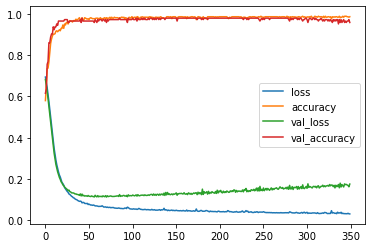

In [210]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [211]:
y_pred = model.predict_classes(X_test)

In [212]:

print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[53  2]
[ 4 84]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        55
           1       0.98      0.95      0.97        88

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [213]:
model_accuracy = accuracy_score(y_test, y_pred)
model_f1_score = f1_score(y_test, y_pred, average='weighted')
model_recall = recall_score(y_test, y_pred, average='weighted')
print('model_accuracy:',model_accuracy,
      '\nmodel_f1_score:',model_f1_score,
      '\nmodel_recall:',model_recall)

model_accuracy: 0.958041958041958 
model_f1_score: 0.9581754452444108 
model_recall: 0.958041958041958


## Example Two: Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [214]:
# from tensorflow.keras.callbacks import EarlyStopping

In [215]:
model = Sequential()
model.add(Dense(units=24,activation='relu'))
model.add(Dense(units=12,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=["accuracy"])

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [216]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15) # loss azalan birsey oldugu icin min secilir, accuracy monite edilseydi max yazilirdi.


In [217]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=350,
#           batch_size=16,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/350
14/14 [==============================] - 1s 16ms/step - loss: 0.6712 - accuracy: 0.7040 - val_loss: 0.6438 - val_accuracy: 0.7762
Epoch 2/350
14/14 [==============================] - 0s 4ms/step - loss: 0.6346 - accuracy: 0.7593 - val_loss: 0.6146 - val_accuracy: 0.8112
Epoch 3/350
14/14 [==============================] - 0s 4ms/step - loss: 0.5969 - accuracy: 0.8089 - val_loss: 0.5803 - val_accuracy: 0.8531
Epoch 4/350
14/14 [==============================] - 0s 4ms/step - loss: 0.5586 - accuracy: 0.8599 - val_loss: 0.5407 - val_accuracy: 0.9021
Epoch 5/350
14/14 [==============================] - 0s 5ms/step - loss: 0.5217 - accuracy: 0.8943 - val_loss: 0.4932 - val_accuracy: 0.9301
Epoch 6/350
14/14 [==============================] - 0s 5ms/step - loss: 0.4826 - accuracy: 0.9104 - val_loss: 0.4469 - val_accuracy: 0.9371
Epoch 7/350
14/14 [==============================] - 0s 4ms/step - loss: 0.4380 - accuracy: 0.9197 - val_loss: 0.4049 - val_accuracy: 0.9301
Epoch 8/350


Epoch 59/350
14/14 [==============================] - 0s 5ms/step - loss: 0.0680 - accuracy: 0.9781 - val_loss: 0.1215 - val_accuracy: 0.9650
Epoch 60/350
14/14 [==============================] - 0s 5ms/step - loss: 0.0617 - accuracy: 0.9856 - val_loss: 0.1346 - val_accuracy: 0.9650
Epoch 61/350
14/14 [==============================] - 0s 5ms/step - loss: 0.0662 - accuracy: 0.9745 - val_loss: 0.1220 - val_accuracy: 0.9720
Epoch 62/350
14/14 [==============================] - 0s 5ms/step - loss: 0.0542 - accuracy: 0.9823 - val_loss: 0.1234 - val_accuracy: 0.9720
Epoch 63/350
14/14 [==============================] - 0s 4ms/step - loss: 0.0940 - accuracy: 0.9650 - val_loss: 0.1288 - val_accuracy: 0.9790
Epoch 64/350
14/14 [==============================] - 0s 4ms/step - loss: 0.0642 - accuracy: 0.9793 - val_loss: 0.1211 - val_accuracy: 0.9650
Epoch 65/350
14/14 [==============================] - 0s 9ms/step - loss: 0.0605 - accuracy: 0.9812 - val_loss: 0.1256 - val_accuracy: 0.9720
Epoch 

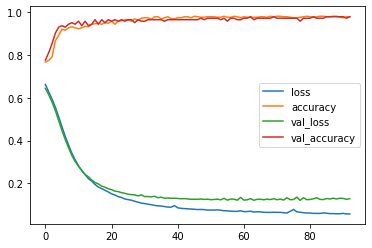

In [218]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [219]:
y_pred = model.predict_classes(X_test)

In [220]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[54  1]
[ 2 86]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [221]:
model_accuracy = accuracy_score(y_test, y_pred)
model_f1_score = f1_score(y_test, y_pred, average='weighted')
model_recall = recall_score(y_test, y_pred, average='weighted')
print('model_accuracy:',model_accuracy,
      '\nmodel_f1_score:',model_f1_score,
      '\nmodel_recall:',model_recall)

model_accuracy: 0.9790209790209791 
model_f1_score: 0.9790555390555389 
model_recall: 0.9790209790209791


## Example Three: Adding in DropOut Layers
DropOut: belirlediğimiz oranda nöronları pasifleştiriyor

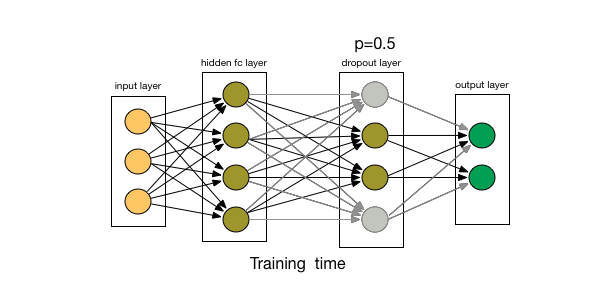

In [233]:
from tensorflow.keras.layers import Dropout

In [234]:
model = Sequential()
model.add(Dense(units=24,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=12,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=["accuracy"])

In [235]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=350,
#           batch_size=16,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/350
14/14 [==============================] - 1s 18ms/step - loss: 0.6958 - accuracy: 0.5481 - val_loss: 0.6788 - val_accuracy: 0.5874
Epoch 2/350
14/14 [==============================] - 0s 5ms/step - loss: 0.6696 - accuracy: 0.6007 - val_loss: 0.6648 - val_accuracy: 0.6154
Epoch 3/350
14/14 [==============================] - 0s 4ms/step - loss: 0.6627 - accuracy: 0.6309 - val_loss: 0.6488 - val_accuracy: 0.6154
Epoch 4/350
14/14 [==============================] - 0s 5ms/step - loss: 0.6491 - accuracy: 0.6515 - val_loss: 0.6314 - val_accuracy: 0.6224
Epoch 5/350
14/14 [==============================] - 0s 4ms/step - loss: 0.6496 - accuracy: 0.6206 - val_loss: 0.6149 - val_accuracy: 0.6364
Epoch 6/350
14/14 [==============================] - 0s 5ms/step - loss: 0.6256 - accuracy: 0.6648 - val_loss: 0.5996 - val_accuracy: 0.6853
Epoch 7/350
14/14 [==============================] - 0s 5ms/step - loss: 0.6163 - accuracy: 0.6721 - val_loss: 0.5825 - val_accuracy: 0.7063
Epoch 8/350


Epoch 59/350
14/14 [==============================] - 0s 5ms/step - loss: 0.1935 - accuracy: 0.9428 - val_loss: 0.1175 - val_accuracy: 0.9510
Epoch 60/350
14/14 [==============================] - 0s 4ms/step - loss: 0.2200 - accuracy: 0.9251 - val_loss: 0.1203 - val_accuracy: 0.9510
Epoch 61/350
14/14 [==============================] - 0s 5ms/step - loss: 0.1935 - accuracy: 0.9377 - val_loss: 0.1223 - val_accuracy: 0.9510
Epoch 62/350
14/14 [==============================] - 0s 4ms/step - loss: 0.1712 - accuracy: 0.9450 - val_loss: 0.1163 - val_accuracy: 0.9510
Epoch 63/350
14/14 [==============================] - 0s 4ms/step - loss: 0.1657 - accuracy: 0.9361 - val_loss: 0.1149 - val_accuracy: 0.9580
Epoch 64/350
14/14 [==============================] - 0s 5ms/step - loss: 0.2071 - accuracy: 0.9218 - val_loss: 0.1229 - val_accuracy: 0.9510
Epoch 65/350
14/14 [==============================] - 0s 4ms/step - loss: 0.1753 - accuracy: 0.9376 - val_loss: 0.1168 - val_accuracy: 0.9510
Epoch 

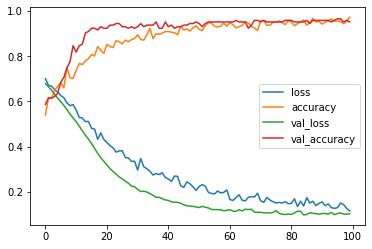

In [236]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [237]:
y_pred = model.predict_classes(X_test)

In [238]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[51  4]
[ 3 85]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94        55
           1       0.96      0.97      0.96        88

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [239]:
model_accuracy = accuracy_score(y_test, y_pred)
model_f1_score = f1_score(y_test, y_pred, average='weighted')
model_recall = recall_score(y_test, y_pred, average='weighted')
print('model_accuracy:',model_accuracy,
      '\nmodel_f1_score:',model_f1_score,
      '\nmodel_recall:',model_recall)

model_accuracy: 0.951048951048951 
model_f1_score: 0.9509626847521422 
model_recall: 0.951048951048951


# Model Evaluation

https://en.wikipedia.org/wiki/Precision_and_recall

In [240]:
from sklearn.metrics import classification_report,confusion_matrix, f1_score, recall_score, accuracy_score

In [241]:
y_pred = model.predict_classes(X_test)
# ML de .predict ile yapilirken DL de predict_classes() kullaniliyor.

In [242]:
print('Confusion Matrix:',*confusion_matrix(y_test,y_pred), sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[51  4]
[ 3 85]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94        55
           1       0.96      0.97      0.96        88

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



In [243]:
model_accuracy = accuracy_score(y_test, y_pred)
model_f1_score = f1_score(y_test, y_pred, average='weighted')
model_recall = recall_score(y_test, y_pred, average='weighted')
print('model_accuracy:',model_accuracy,
      '\nmodel_f1_score:',model_f1_score,
      '\nmodel_recall:',model_recall)

model_accuracy: 0.951048951048951 
model_f1_score: 0.9509626847521422 
model_recall: 0.951048951048951


## Predicting on brand new data

In [246]:
df.iloc[0]

mean radius                17.990000
mean texture               10.380000
mean smoothness             0.118400
mean compactness            0.277600
mean concavity              0.300100
mean concave points         0.147100
mean symmetry               0.241900
mean fractal dimension      0.078710
radius error                1.095000
texture error               0.905300
smoothness error            0.006399
compactness error           0.049040
concavity error             0.053730
concave points error        0.015870
symmetry error              0.030030
fractal dimension error     0.006193
worst texture              17.330000
worst smoothness            0.162200
worst compactness           0.665600
worst concavity             0.711900
worst concave points        0.265400
worst symmetry              0.460100
worst fractal dimension     0.118900
benign_0__mal_1             0.000000
Name: 0, dtype: float64

In [250]:
df.shape

(569, 24)

In [257]:
single_data= df.drop('benign_0__mal_1',axis=1).iloc[0]
single_data = scaler.transform(single_data.values.reshape(-1, 23)) # -1; tüm satırı al, sutunu ben belirleyeceğim

In [258]:
print('Prediction: ', *model.predict_classes(single_data)[0], 
      '\nActual: ',df['benign_0__mal_1'].iloc[0], sep='')

Prediction: 0
Actual: 0
